# EDA House Price Dataset

In [103]:
# import all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [104]:
# import the dataset 
df = pd.read_csv("../datasets/Housing.csv")
print(df.head())
df.corr(numeric_only=True)

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


In [105]:
# Cleaning data
df.info() #All entries are non null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


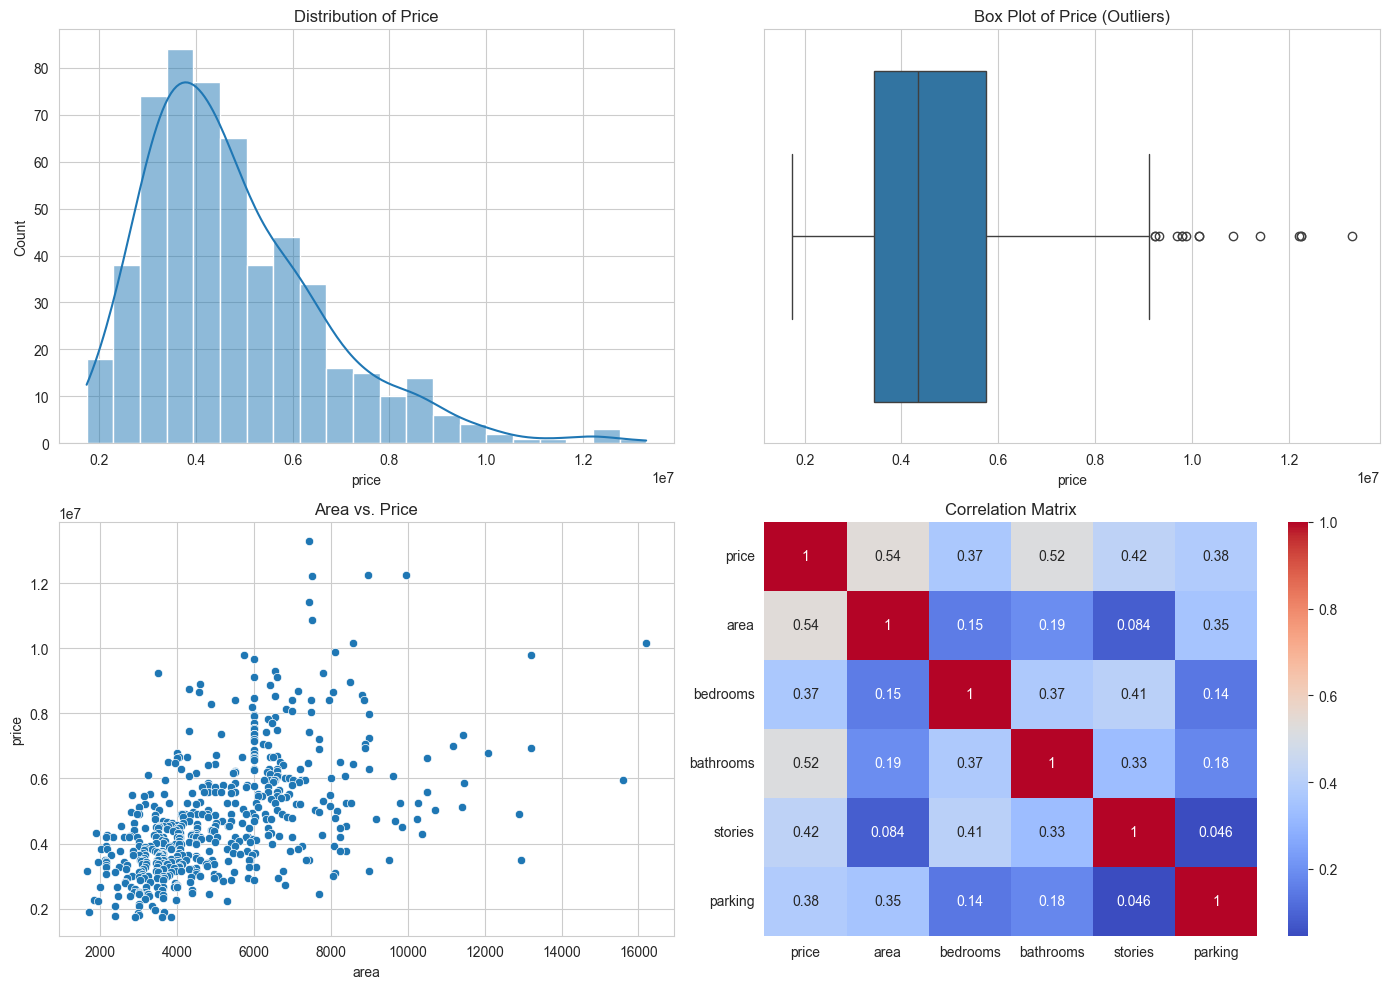

In [106]:
# Set a nice style for the plots
sns.set_style("whitegrid")

# 1. Calculate Correlation Matrix (Data Prep)
corr_matrix = df.corr(numeric_only=True)

# 2. Create a "Figure" with 2 rows and 2 columns
# figsize=(width, height) in inches
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# --- Plot 1: Histogram (Top Left) ---
# Use sns.histplot for a cleaner look than df.hist()
sns.histplot(df["price"], kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Distribution of Price")

# --- Plot 2: Box Plot (Top Right) ---
# Shows outliers clearly
sns.boxplot(x=df["price"], ax=axes[0, 1])
axes[0, 1].set_title("Box Plot of Price (Outliers)")

# --- Plot 3: Scatter Plot (Bottom Left) ---
# 'area' vs 'price'
sns.scatterplot(x="area", y="price", data=df, ax=axes[1, 0])
axes[1, 0].set_title("Area vs. Price")

# --- Plot 4: Correlation Heatmap (Bottom Right) ---
# annot=True shows the numbers inside the boxes
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", ax=axes[1, 1])
axes[1, 1].set_title("Correlation Matrix")

# 3. Clean up layout so labels don't overlap
plt.tight_layout()
plt.show()

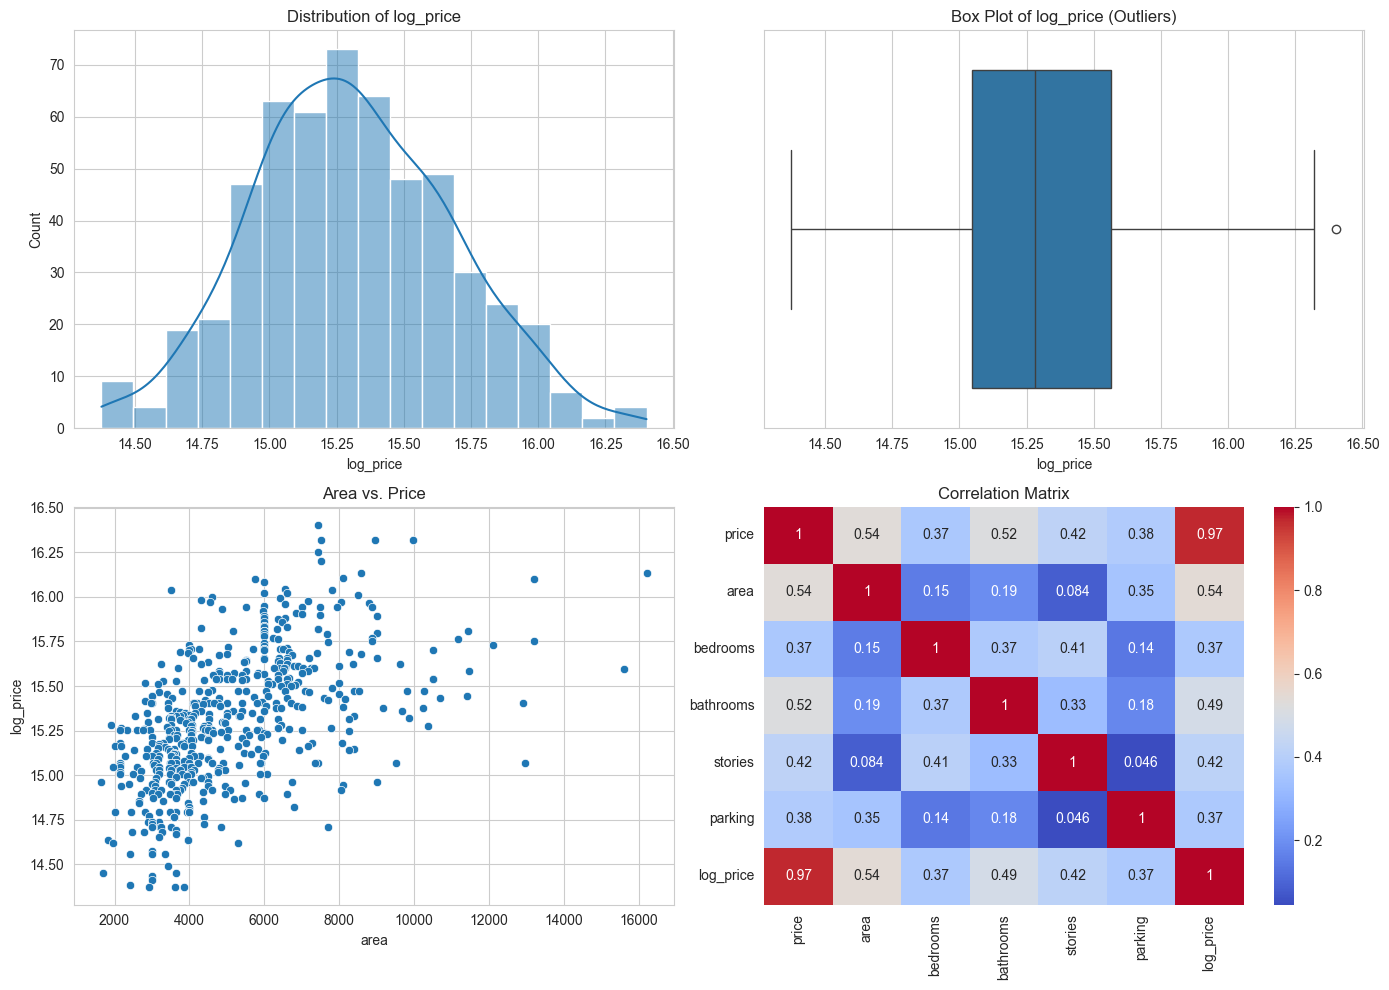

In [107]:
df["log_price"] = np.log1p(df["price"])
df.corr(numeric_only=True)
# plt.show()


sns.set_style("whitegrid")

# 1. Calculate Correlation Matrix (Data Prep)
corr_matrix = df.corr(numeric_only=True)

# 2. Create a "Figure" with 2 rows and 2 columns
# figsize=(width, height) in inches
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# --- Plot 1: Histogram (Top Left) ---
# Use sns.histplot for a cleaner look than df.hist()
sns.histplot(df["log_price"], kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Distribution of log_price")

# --- Plot 2: Box Plot (Top Right) ---
# Shows outliers clearly
sns.boxplot(x=df["log_price"], ax=axes[0, 1])
axes[0, 1].set_title("Box Plot of log_price (Outliers)")

# --- Plot 3: Scatter Plot (Bottom Left) ---
# 'area' vs 'log_price'
sns.scatterplot(x="area", y="log_price", data=df, ax=axes[1, 0])
axes[1, 0].set_title("Area vs. Price")

# --- Plot 4: Correlation Heatmap (Bottom Right) ---
# annot=True shows the numbers inside the boxes
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", ax=axes[1, 1])
axes[1, 1].set_title("Correlation Matrix")

# 3. Clean up layout so labels don't overlap
plt.tight_layout()
plt.show()

In [167]:
# now i can start linear regression and find weight and biases

# y = log price
# x1 = area x2 = bathrooms

# Train and Test split
df["stories_sq"] = df["stories"]**2
# df["area_sr"] = df["area"]**3
df_train = df.sample(frac=0.8, random_state=1)
df_test = df.drop(df_train.index)

# 3. Standardization (Features)
cols = ["area", "bathrooms", "bedrooms","stories_sq", "parking"]

# Get stats from TRAIN only
train_mu = df_train[cols].mean()
train_std = df_train[cols].std()

# Transform both using Z-transform
x_train = (df_train[cols] - train_mu) / train_std
x_test = (df_test[cols] - train_mu) / train_std  # Use TRAIN stats here!

one = np.ones((x_train.shape[0], 1))
x_train = np.hstack((one,x_train))
one = np.ones((x_test.shape[0], 1))
x_test = np.hstack((one, x_test))
y_train = np.array(df_train["log_price"]).reshape((len(x_train),1))
y_test = np.array(df_test["log_price"]).reshape((len(x_test),1))

In [164]:
# Initialise Parameters all parameters with 0

theta = np.zeros((1,x_train.shape[1]))

# Hyperparameters
lr = 0.1
epochs = 10000
theta.shape
# theta.T.shape

(1, 6)

In [170]:
for i in range(0,epochs):
    y_pred = np.dot(x_train, theta.T)
    e = y_train - y_pred
    theta = theta + (lr * (1 / len(x_train)) * np.dot(e.T, x_train))
    if i % 100 == 0:
        loss = np.mean(e**2)
        print(f"Epoch {i}: Loss {loss}")

Epoch 0: Loss 0.06749966635134201
Epoch 100: Loss 0.06499044340277606
Epoch 200: Loss 0.0649904375401297
Epoch 300: Loss 0.06499043754010779
Epoch 400: Loss 0.06499043754010782
Epoch 500: Loss 0.06499043754010778
Epoch 600: Loss 0.0649904375401078
Epoch 700: Loss 0.0649904375401078
Epoch 800: Loss 0.0649904375401078
Epoch 900: Loss 0.0649904375401078
Epoch 1000: Loss 0.0649904375401078
Epoch 1100: Loss 0.0649904375401078
Epoch 1200: Loss 0.0649904375401078
Epoch 1300: Loss 0.0649904375401078
Epoch 1400: Loss 0.0649904375401078
Epoch 1500: Loss 0.0649904375401078
Epoch 1600: Loss 0.0649904375401078
Epoch 1700: Loss 0.0649904375401078
Epoch 1800: Loss 0.0649904375401078
Epoch 1900: Loss 0.0649904375401078
Epoch 2000: Loss 0.0649904375401078
Epoch 2100: Loss 0.0649904375401078
Epoch 2200: Loss 0.0649904375401078
Epoch 2300: Loss 0.0649904375401078
Epoch 2400: Loss 0.0649904375401078
Epoch 2500: Loss 0.0649904375401078
Epoch 2600: Loss 0.0649904375401078
Epoch 2700: Loss 0.0649904375401078

# Implementing closed form solution 

In [ ]:
# Formula: (X^T * X)^-1 * X^T * y
# 1. Calculate X transpose times X
XTX = x_train.T.dot(x_train)

# 2. Calculate the inverse of (XTX) and multiply by X transpose

theta_best = np.linalg.inv(XTX).dot(x_train.T).dot(y_train)

# 3. View the results
print("Optimal Weights (including bias):")
print(theta_best.T)  # Transposed just to read it easily in one line

Optimal Weights (including bias):
[[15.30192379  0.14511012  0.09737308  0.04504769  0.09014632  0.0552506 ]]


In [171]:

theta

array([[15.30192379,  0.14511012,  0.09737308,  0.04504769,  0.09014632,
         0.0552506 ]])

In [172]:
# Calculate R-squared
y_pred = np.dot(x_test, theta.T)
ssr = np.sum((y_test - y_pred) ** 2)  # Sum of Squares Residual
sst = np.sum((y_test - np.mean(y_test)) ** 2)  # Total Sum of Squares
r2 = 1 - (ssr / sst)

print(f"R2 Score: {r2:.4f}")

R2 Score: 0.5570


In [175]:
# Reversing the log transformation
actual_prices = np.exp(y_test)
predicted_prices = np.exp(y_pred)

# Calculate Mean Absolute Error (MAE) in dollars
mae_dollars = np.mean(np.abs(actual_prices - predicted_prices))

print(f"Average Error: ${mae_dollars:,.2f}")

Average Error: $922,778.68


In [156]:
median_error = np.median(np.abs(actual_prices - predicted_prices))
print(f"Median Error: ${median_error:,.2f}")

Median Error: $660,011.26


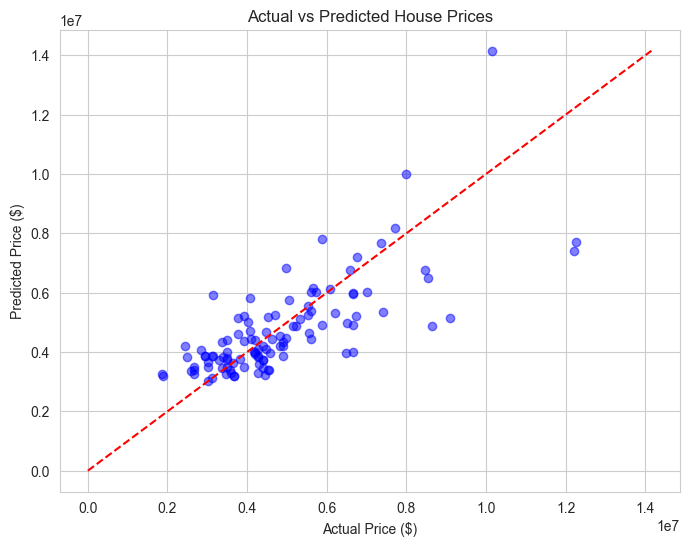

In [155]:


plt.figure(figsize=(8, 6))
plt.scatter(actual_prices, predicted_prices, alpha=0.5, color="blue")

# Draw a diagonal line showing where "Perfect Prediction" would be
max_val = max(actual_prices.max(), predicted_prices.max())
plt.plot([0, max_val], [0, max_val], color="red", linestyle="--")

plt.xlabel("Actual Price ($)")
plt.ylabel("Predicted Price ($)")
plt.title("Actual vs Predicted House Prices")
plt.show()